In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import glmpy
from icecream import ic

/home/rg972/.conda/envs/poop/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:404: UserWarning: [<class 'dict'>] is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(
/home/rg972/.conda/envs/poop/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:404: UserWarning: [<class 'dict'>] is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


ic| grad: tensor([  0.0000, -96.7775, -59.4644, 436.6172], dtype=torch.float64)
ic| grad: tensor([  0.0000, -96.7775, -59.4644, 436.6172], dtype=torch.float64)
ic| grad: tensor([    0.0000,   -29.2080,  -208.1265, -1160.6661], dtype=torch.float64)
ic| grad: tensor([    0.0000,   -29.2080,  -208.1265, -1160.6661], dtype=torch.float64)
ic| grad: tensor([   0.0000,  -80.4702,  680.5031, 3600.4513], dtype=torch.float64)
ic| grad: tensor([   0.0000,  -80.4702,  680.5031, 3600.4513], dtype=torch.float64)
ic| grad: tensor([   0.0000, -147.5813,  447.0709, -311.9455], dtype=torch.float64)
ic| grad: tensor([   0.0000, -147.5813,  447.0709, -311.9455], dtype=torch.float64)
ic| grad: tensor([   0.0000,  221.5050,  -43.2864, 1803.0917], dtype=torch.float64)
ic| grad: tensor([   0.0000,  221.5050,  -43.2864, 1803.0917], dtype=torch.float64)
ic| grad: tensor([0.0000e+00, 4.0760e-05, 1.9620e-05, 3.9620e-05], dtype=torch.float64)
ic| grad: tensor([0.0000, 0.0004, 0.0002, 0.0004], dtype=torch.float64)


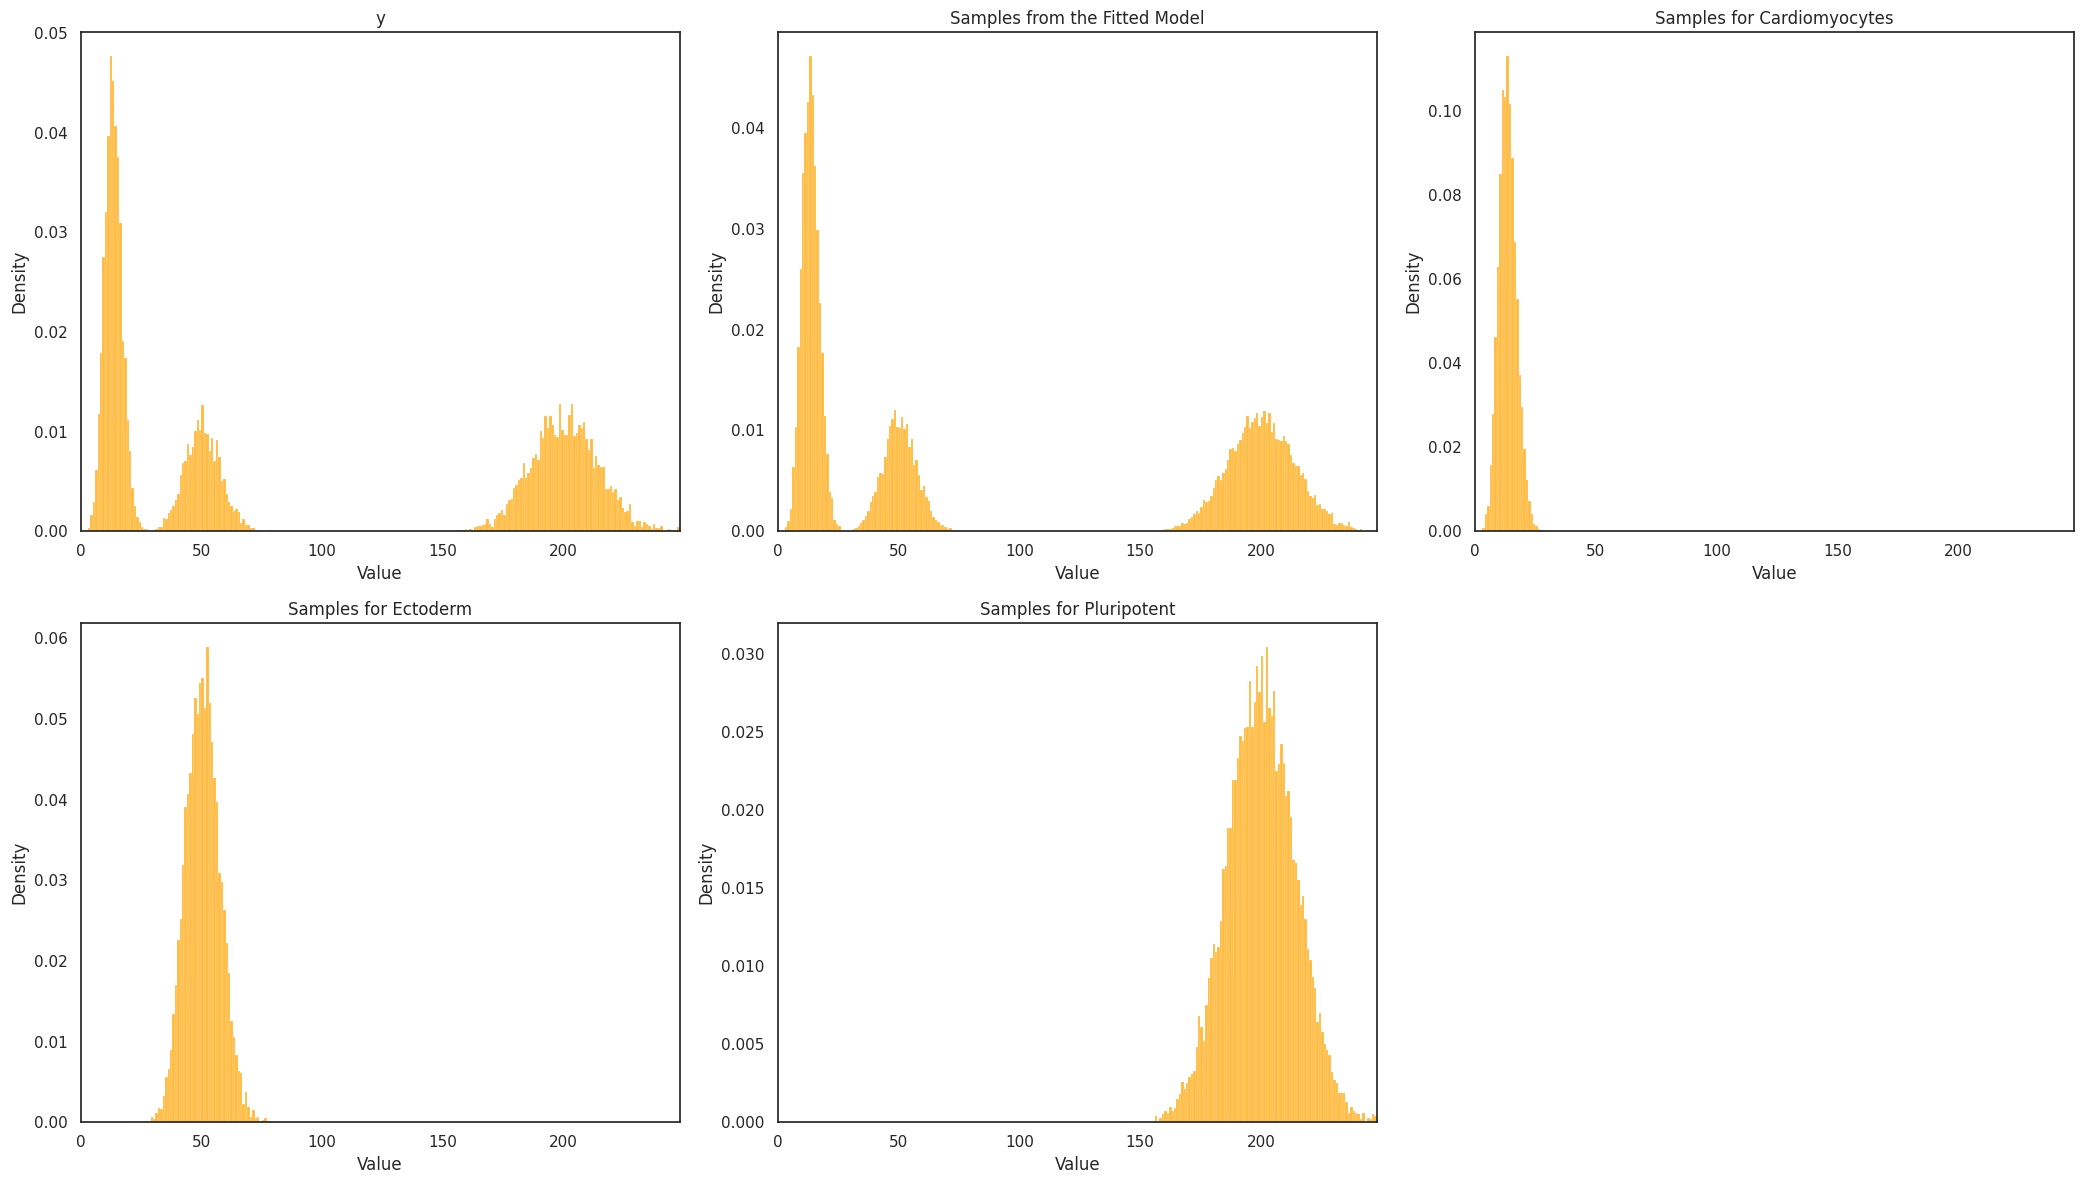

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glmpy import PoissonModel

# Function to generate data
def generate_data(size):
    cell_types = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]
    probabilities = [0.4, 0.2, 0.4]
    poisson_lambdas = [13, 50, 200]
    # log lambdas
    # poisson_lambdas = [2.56, 3.91, 5.30]

    cell_type_samples = np.random.choice(cell_types, size=size, p=probabilities)
    
    y_samples = np.zeros(size, dtype=int)
    for i, cell_type in enumerate(cell_types):
        indices = np.where(cell_type_samples == cell_type)[0]
        y_samples[indices] = np.random.poisson(lam=poisson_lambdas[i], size=len(indices))
    
    covariates = {
        "cell_type": cell_type_samples,
    }
    
    return y_samples, covariates

# Generate data
y, covariates = generate_data(size=10000)

# Fit the model (assuming PoissonModel class and its fit method are defined)
model = PoissonModel(y=y, covariates=covariates, name="PoissonModel")
fit_res = model.fit(
    optimization_method="dogleg",
    verbose=False,
    parallel=False,
    ret_time=False,
    regularization_params=None,
    safe=False,
    minimize_options={"disp": False, "maxiter": None},
)

# Extract parameters and generate samples from the fitted model
params = fit_res[0]
X = model.X
pmf = model.pmf_range(params=params, upper_bound=260, lower_bound=0, design_matrix=X, mu=None)
pmf = pmf / np.sum(pmf)

ic(model.mu_param_dict)

# Generate samples from the fitted model
samples = model.sample(params=params, size=20000, design_matrix=X)

# Covariate list
covariate_list = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]

# Plotting the results
sns.set(style="white")
plt.figure(figsize=(21, 12))

x_max = np.max(y)
bins = np.arange(0, x_max + 1)

plt.subplot(2, 3, 1)
sns.histplot(y, bins=bins, kde=False, color='orange', stat='density')
plt.xlim(0, x_max)

plt.title('y')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 3, 2)
sns.histplot(samples, bins=bins, kde=False, color='orange', stat='density')
plt.xlim(0, x_max)

plt.title('Samples from the Fitted Model')
plt.xlabel('Value')
plt.ylabel('Density')

# Loop through each cell type and plot results
for i, cell_type in enumerate(covariate_list):
    samples_covariate = PoissonModel.sample_from_covariate(params=params, covariate=cell_type, covariate_list=covariate_list, size=10000, design_matrix=X)
    plt.subplot(2, 3, i + 3)
    sns.histplot(samples_covariate, bins=bins, kde=False, color='orange', stat='density')
    plt.xlim(0, x_max)
    plt.title(f'Samples for {cell_type}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


ic| grad: tensor([    0.0000,   397.2288,   955.1521,  7649.7103,     0.0000,  -220.3809,
                   -255.6650, -1191.1842], dtype=torch.float64)
ic| grad: tensor([    0.0000,   397.2288,   955.1521,  7649.7103,     0.0000,  -220.3809,
                   -255.6650, -1191.1842], dtype=torch.float64)
ic| grad: tensor([    0.0000,   402.2792,   973.3037,  7631.0888,     0.0000,  -208.3326,
                   -248.4823, -1168.5309], dtype=torch.float64)
ic| grad: tensor([    0.0000,   402.2792,   973.3037,  7631.0888,     0.0000,  -208.3326,
                   -248.4823, -1168.5309], dtype=torch.float64)
ic| grad: tensor([    0.0000,   396.0307,   958.2030,  7653.6539,     0.0000,  -178.1688,
                   -258.2159, -1271.4306], dtype=torch.float64)
ic| grad: tensor([    0.0000,   396.0307,   958.2030,  7653.6539,     0.0000,  -178.1688,
                   -258.2159, -1271.4306], dtype=torch.float64)
ic| grad: tensor([    0.0000,   377.4491,   968.2641,  7392.6997,     0.0000

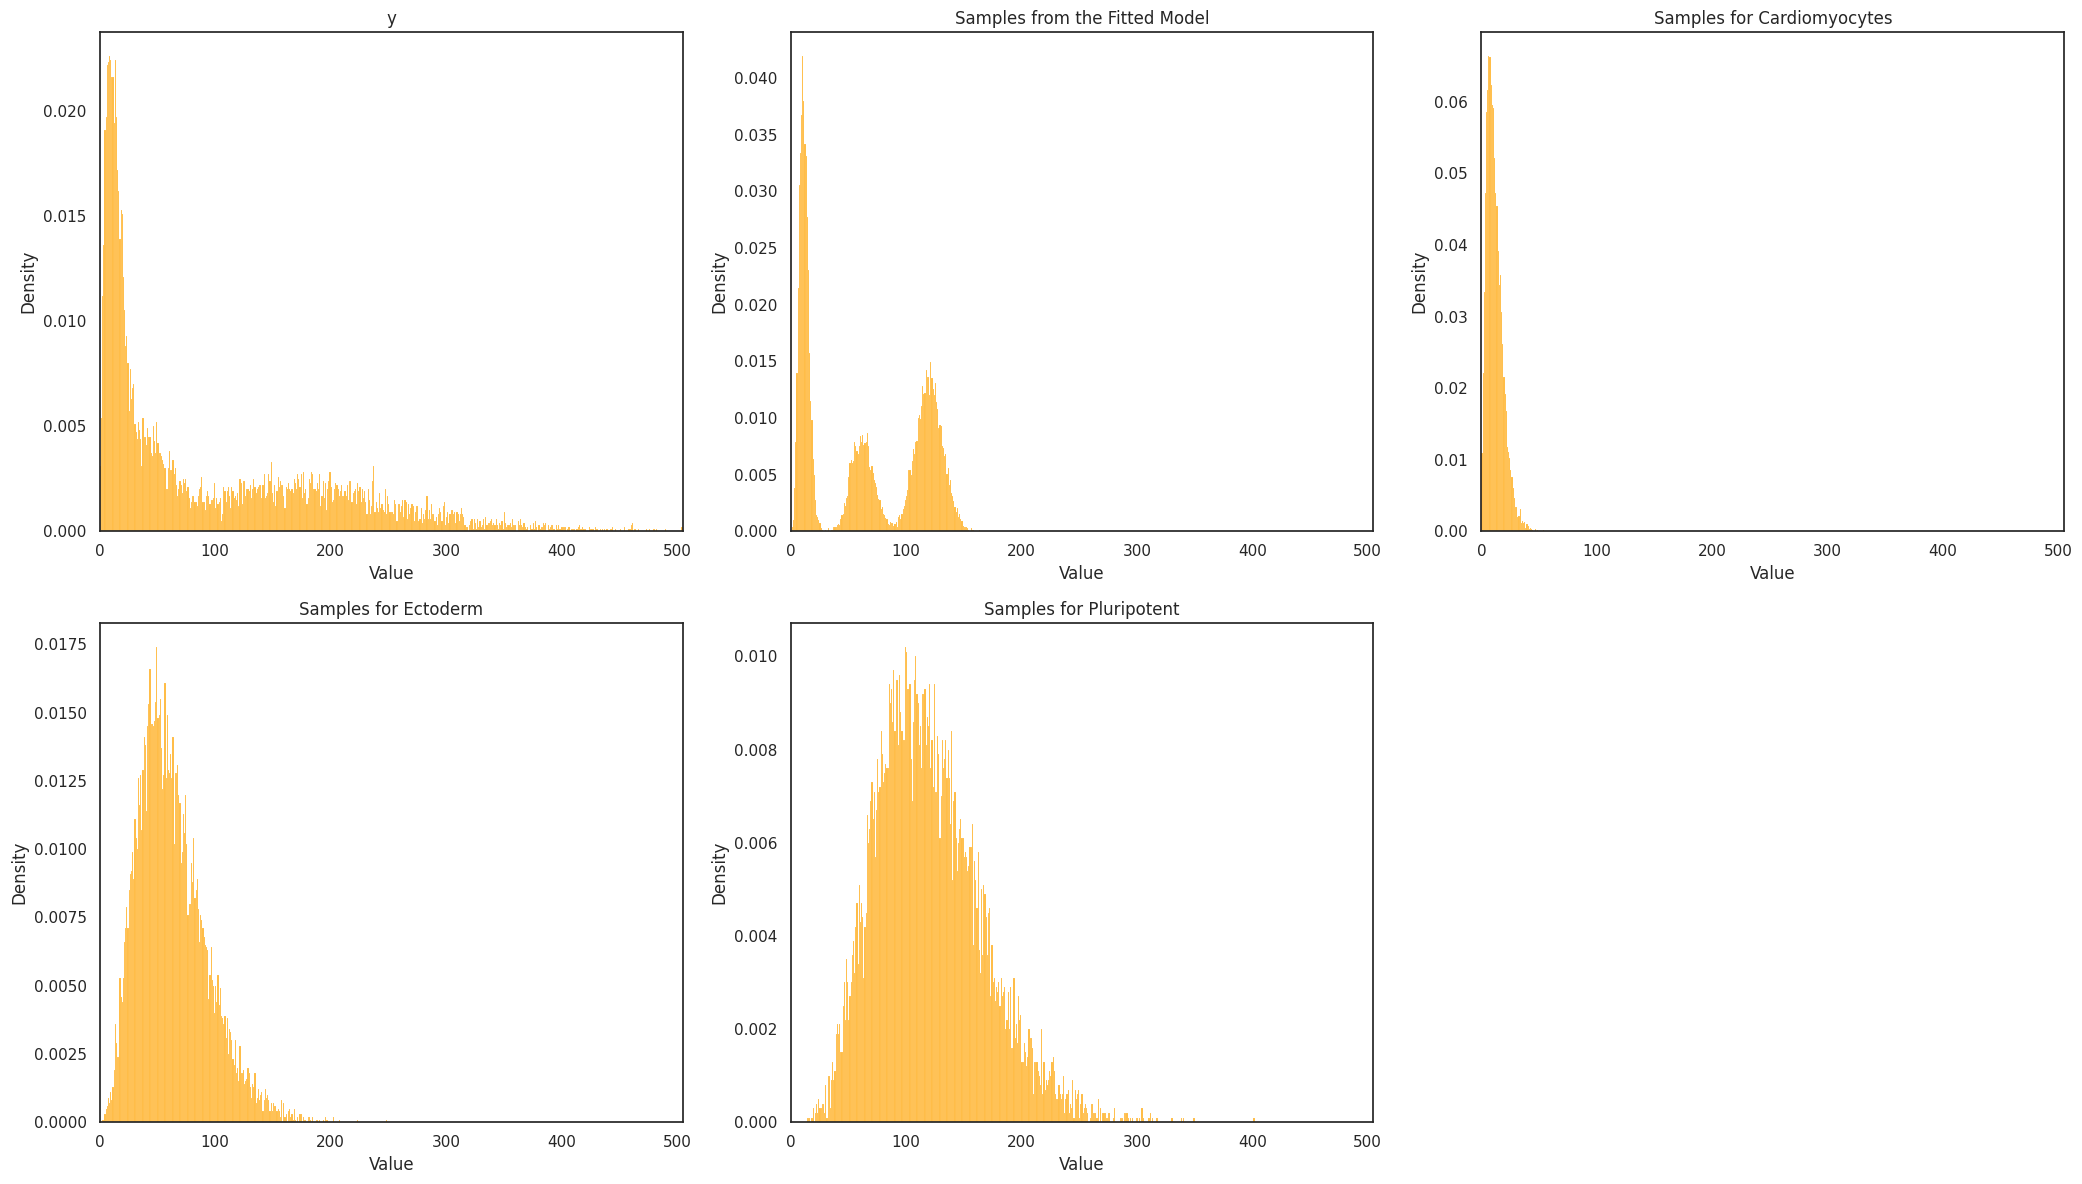

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom
from glmpy import NBModel

# Function to generate data
def generate_data(size):
    cell_types = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]
    probabilities = [0.4, 0.2, 0.4]
    mu_values = [13, 50, 200]
    alpha_values = [3, 5, 7]  # Dispersion parameters for each cell type
    # means - [2.56, 3.91, 5.30]

    cell_type_samples = np.random.choice(cell_types, size=size, p=probabilities)
    
    y_samples = np.zeros(size, dtype=int)
    
    for i, cell_type in enumerate(cell_types):
        indices = np.where(cell_type_samples == cell_type)[0]
        mu = mu_values[i]
        alpha = alpha_values[i]
        r = alpha
        p = alpha / (mu + alpha)
        y_samples[indices] = nbinom.rvs(r, p, size=len(indices))
    
    covariates = {
        "cell_type": cell_type_samples,
    }
    
    return y_samples, covariates

# Generate data
y, covariates = generate_data(size=10000)

# Fit the model
model = NBModel(y=y, covariates=covariates, name="NBModel")
fit_res = model.fit(
    optimization_method="dogleg",
    verbose=False,
    parallel=False,
    ret_time=False,
    regularization_params=None,
    safe=False,
    minimize_options={"disp": False, "maxiter": None},
)

params = fit_res[0]
X = model.X
pmf = model.pmf_range(params=params, upper_bound=260, lower_bound=0, design_matrix=X, mu=None)
pmf = pmf / np.sum(pmf)

samples = model.sample(params=params, size=20000, design_matrix=X)

# Covariate list
covariate_list = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]

# Plotting the results
sns.set(style="white")
plt.figure(figsize=(21, 12))

x_max = np.max(y)
bins = np.arange(0, x_max + 1)

plt.subplot(2, 3, 1)
sns.histplot(y, bins=bins, kde=False, color='orange', stat='density')
plt.xlim(0, x_max)

plt.title('y')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 3, 2)
sns.histplot(samples, bins=bins, kde=False, color='orange', stat='density')
plt.xlim(0, x_max)

plt.title('Samples from the Fitted Model')
plt.xlabel('Value')
plt.ylabel('Density')

# Loop through each cell type and plot results
for i, cell_type in enumerate(covariate_list):
    samples_covariate = NBModel.sample_from_covariate(params, cell_type, covariate_list, 10000, X)
    plt.subplot(2, 3, i + 3)
    sns.histplot(samples_covariate, bins=bins, kde=False, color='orange', stat='density')
    plt.xlim(0, x_max)
    plt.title(f'Samples for {cell_type}')
    plt.xlabel('Value')
    plt.ylabel('Density')

# means - [2.56, 3.91, 5.30]
ic(params)
plt.tight_layout()
plt.show()


ic| grad: tensor([   0.0000,  -94.7440, -164.6339, -419.4040,    0.5335],
                 dtype=torch.float64)
ic| grad: tensor([   0.0000,  -94.7440, -164.6339, -419.4040,    0.5335],
                 dtype=torch.float64)
ic| grad: tensor([   0.0000, -161.8488, -107.7059,    0.0000,   -1.6703],
                 dtype=torch.float64)
ic| grad: tensor([   0.0000, -161.8488, -107.7059,    0.0000,   -1.6703],
                 dtype=torch.float64)
ic| grad: tensor([ 0.0000e+00, -2.0033e+02,  2.8368e+01,  9.6596e+02, -3.1253e-01],
                 dtype=torch.float64)
ic| grad: tensor([ 0.0000e+00, -2.0033e+02,  2.8368e+01,  9.6596e+02, -3.1253e-01],
                 dtype=torch.float64)
ic| grad: tensor([  0.0000, -19.5959, -46.0967, 686.8050,  -1.6888], dtype=torch.float64)
ic| grad: tensor([  0.0000, -19.5959, -46.0967, 686.8050,  -1.6888], dtype=torch.float64)
ic| grad: tensor([   0.0000, -118.0154, -209.1741, 1017.5567,    2.9757],
                 dtype=torch.float64)
ic| grad: tensor

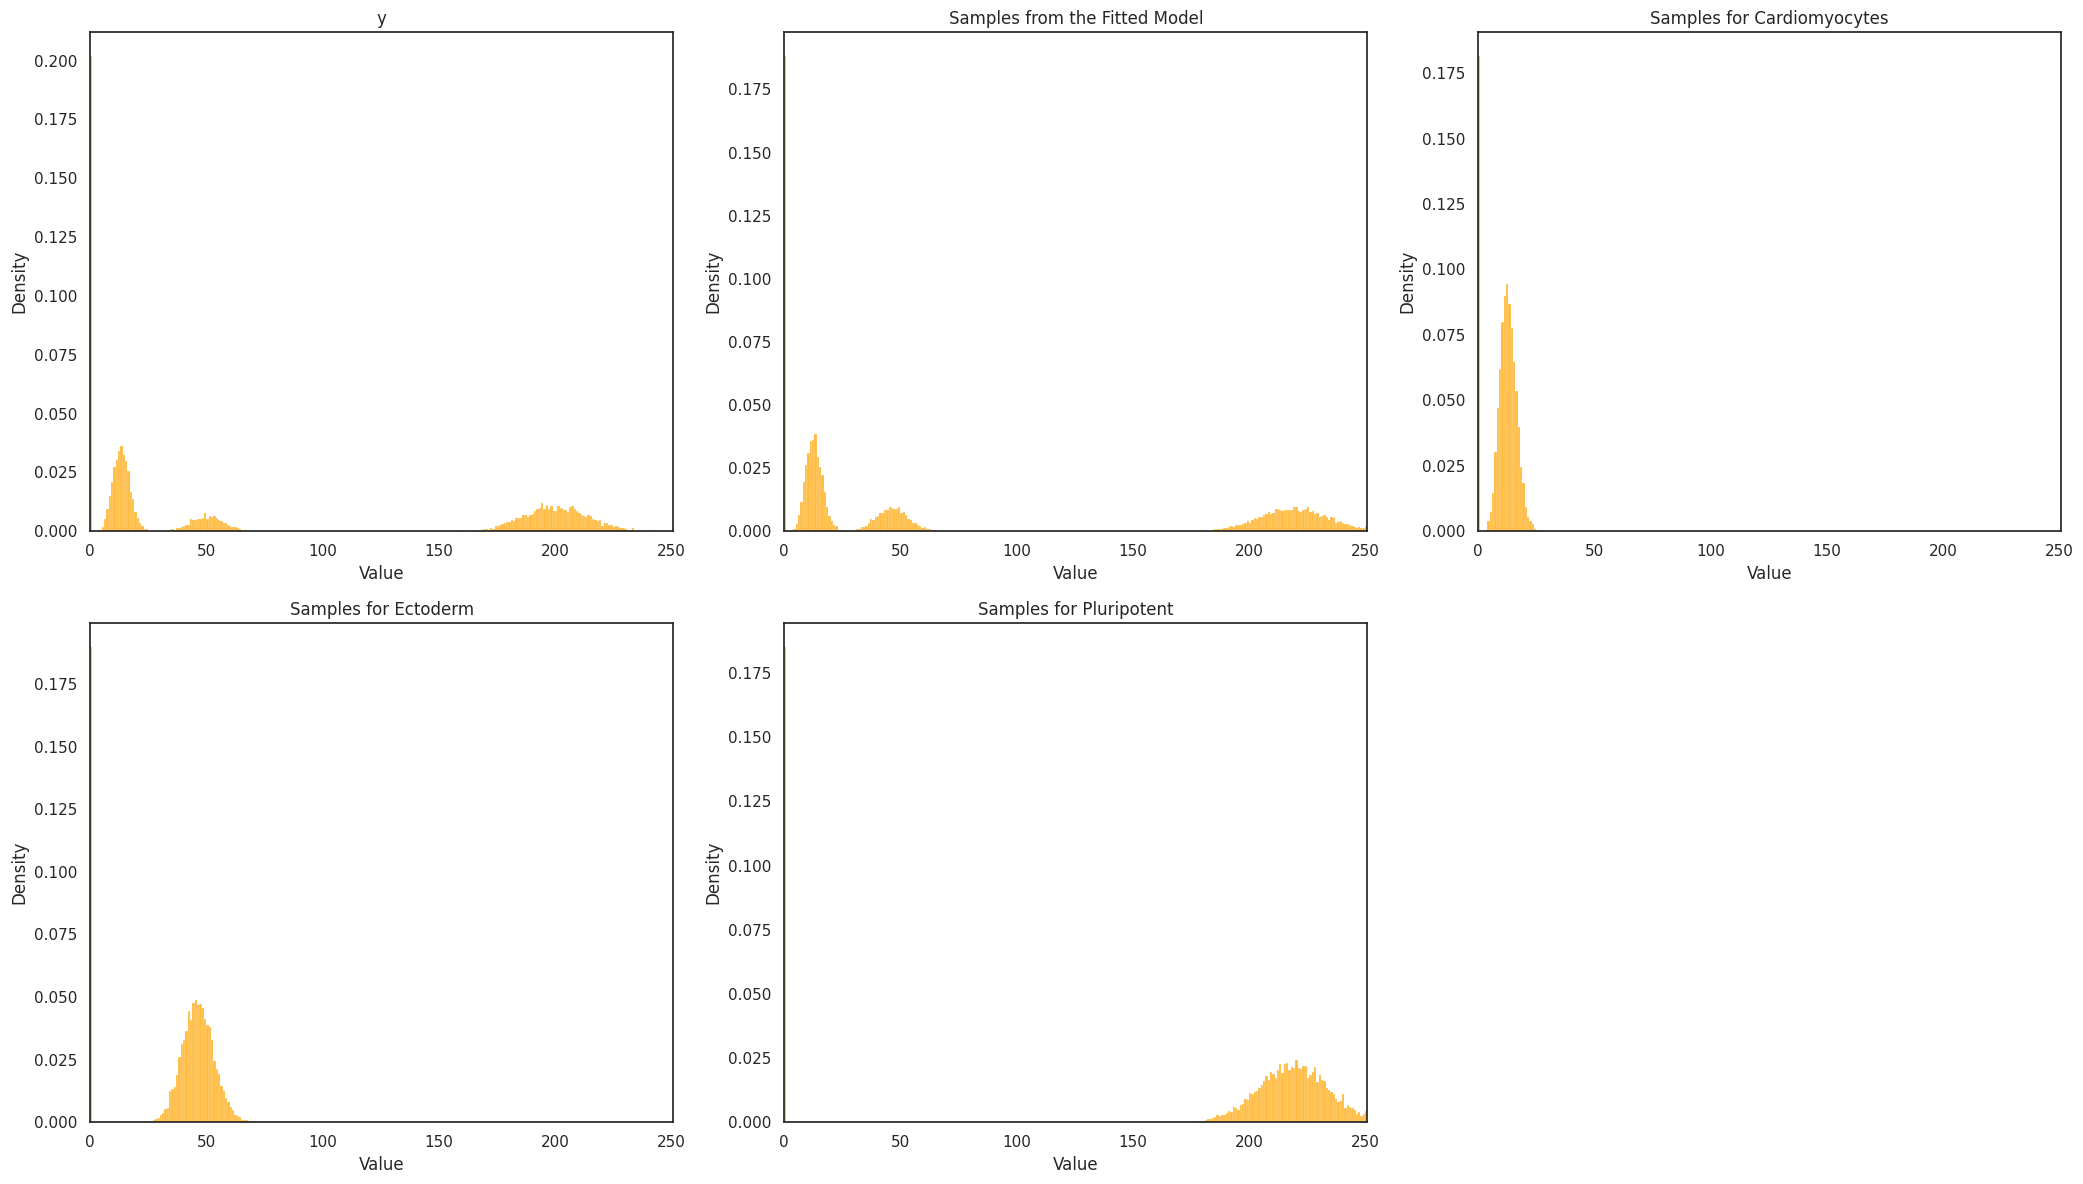

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, bernoulli
from glmpy import ZIPModel

# Function to generate data
def generate_data(size):
    cell_types = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]
    probabilities = [0.4, 0.2, 0.4]
    mu_values = [13, 50, 200]
    pi_values = [0.2, 0.4, 0.1]  # Zero-inflation probabilities for each cell type

    cell_type_samples = np.random.choice(cell_types, size=size, p=probabilities)
    
    y_samples = np.zeros(size, dtype=int)
    
    for i, cell_type in enumerate(cell_types):
        indices = np.where(cell_type_samples == cell_type)[0]
        mu = mu_values[i]
        pi = pi_values[i]
        zero_inflated = bernoulli.rvs(pi, size=len(indices))
        y_samples[indices] = np.where(zero_inflated == 1, 0, poisson.rvs(mu, size=len(indices)))
    
    covariates = {
        "cell_type": cell_type_samples,
    }
    
    return y_samples, covariates

# Generate data
y, covariates = generate_data(size=10000)

# Fit the model
model = ZIPModel(y=y, covariates=covariates, name="ZIPModel")
fit_res = model.fit(
    optimization_method="dogleg",
    verbose=False,
    parallel=False,
    ret_time=False,
    regularization_params=None,
    safe=False,
    minimize_options={"disp": False, "maxiter": None},
)

params = fit_res[0]
X = model.X
pmf = model.pmf_range(params=params, upper_bound=260, lower_bound=0, design_matrix=X, mu=None)
pmf = pmf / np.sum(pmf)

samples = model.sample(params=params, size=20000, design_matrix=X)

# Covariate list
covariate_list = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]

# Plotting the results
sns.set(style="white")
plt.figure(figsize=(21, 12))

x_max = np.max(y)
bins = np.arange(0, x_max + 1)

plt.subplot(2, 3, 1)
sns.histplot(y, bins=bins, kde=False, color='orange', stat='density')
plt.xlim(0, x_max)

plt.title('y')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 3, 2)
sns.histplot(samples, bins=bins, kde=False, color='orange', stat='density')
plt.xlim(0, x_max)

plt.title('Samples from the Fitted Model')
plt.xlabel('Value')
plt.ylabel('Density')

# Loop through each cell type and plot results
for i, cell_type in enumerate(covariate_list):
    samples_covariate = ZIPModel.sample_from_covariate(params, cell_type, covariate_list, 10000, X)
    plt.subplot(2, 3, i + 3)
    sns.histplot(samples_covariate, bins=bins, kde=False, color='orange', stat='density')
    plt.xlim(0, x_max)
    plt.title(f'Samples for {cell_type}')
    plt.xlabel('Value')
    plt.ylabel('Density')


plt.tight_layout()
plt.show()


ic| grad: tensor([   0.0000,  205.4587,  403.0093, 5035.1518,    6.8033,    0.0000,
                   -60.2595,  -52.7646, -319.3917], dtype=torch.float64)
ic| grad: tensor([   0.0000,  205.4587,  403.0093, 5035.1518,    6.8033,    0.0000,
                   -60.2595,  -52.7646, -319.3917], dtype=torch.float64)
ic| grad: tensor([   0.0000,  205.8496,  557.0936, 5002.2776,    8.2943,    0.0000,
                   -57.1967,  -73.4880, -287.7514], dtype=torch.float64)
ic| grad: tensor([   0.0000,  205.8496,  557.0936, 5002.2776,    8.2943,    0.0000,
                   -57.1967,  -73.4880, -287.7514], dtype=torch.float64)
ic| grad: tensor([   0.0000,  179.9086,  482.3470, 5162.8281,    7.3083,    0.0000,
                   -61.3543,  -67.6525, -353.6554], dtype=torch.float64)
ic| grad: tensor([   0.0000,  

179.9086,  482.3470, 5162.8281,    7.3083,    0.0000,
                   -61.3543,  -67.6525, -353.6554], dtype=torch.float64)
ic| grad: tensor([   0.0000,  221.2745,  603.1807, 5222.3347,   13.8678,    0.0000,
                   -71.2039,  -84.8639, -344.6272], dtype=torch.float64)
ic| grad: tensor([   0.0000,  221.2745,  603.1807, 5222.3347,   13.8678,    0.0000,
                   -71.2039,  -84.8639, -344.6272], dtype=torch.float64)
ic| grad: tensor([   0.0000,  178.8593,  519.8319, 4864.0225,    5.4908,    0.0000,
                   -52.0483,  -73.9218, -288.2791], dtype=torch.float64)
ic| grad: tensor([   0.0000,  178.8593,  519.8319, 4864.0225,    5.4908,    0.0000,
                   -52.0483,  -73.9218, -288.2791], dtype=torch.float64)
ic| grad: tensor([ 0.0000e+00,  2.2096e+02,  5.0726e+02,  4.2297e+03,  2.0927e+00,
                   0.0000e+00, -7.0982e+01, -6.4783e+01, -2.6576e+02],
                 dtype=torch.float64)
ic| grad: tensor([ 0.0000e+00,  2.2096e+02,  5.0726e+

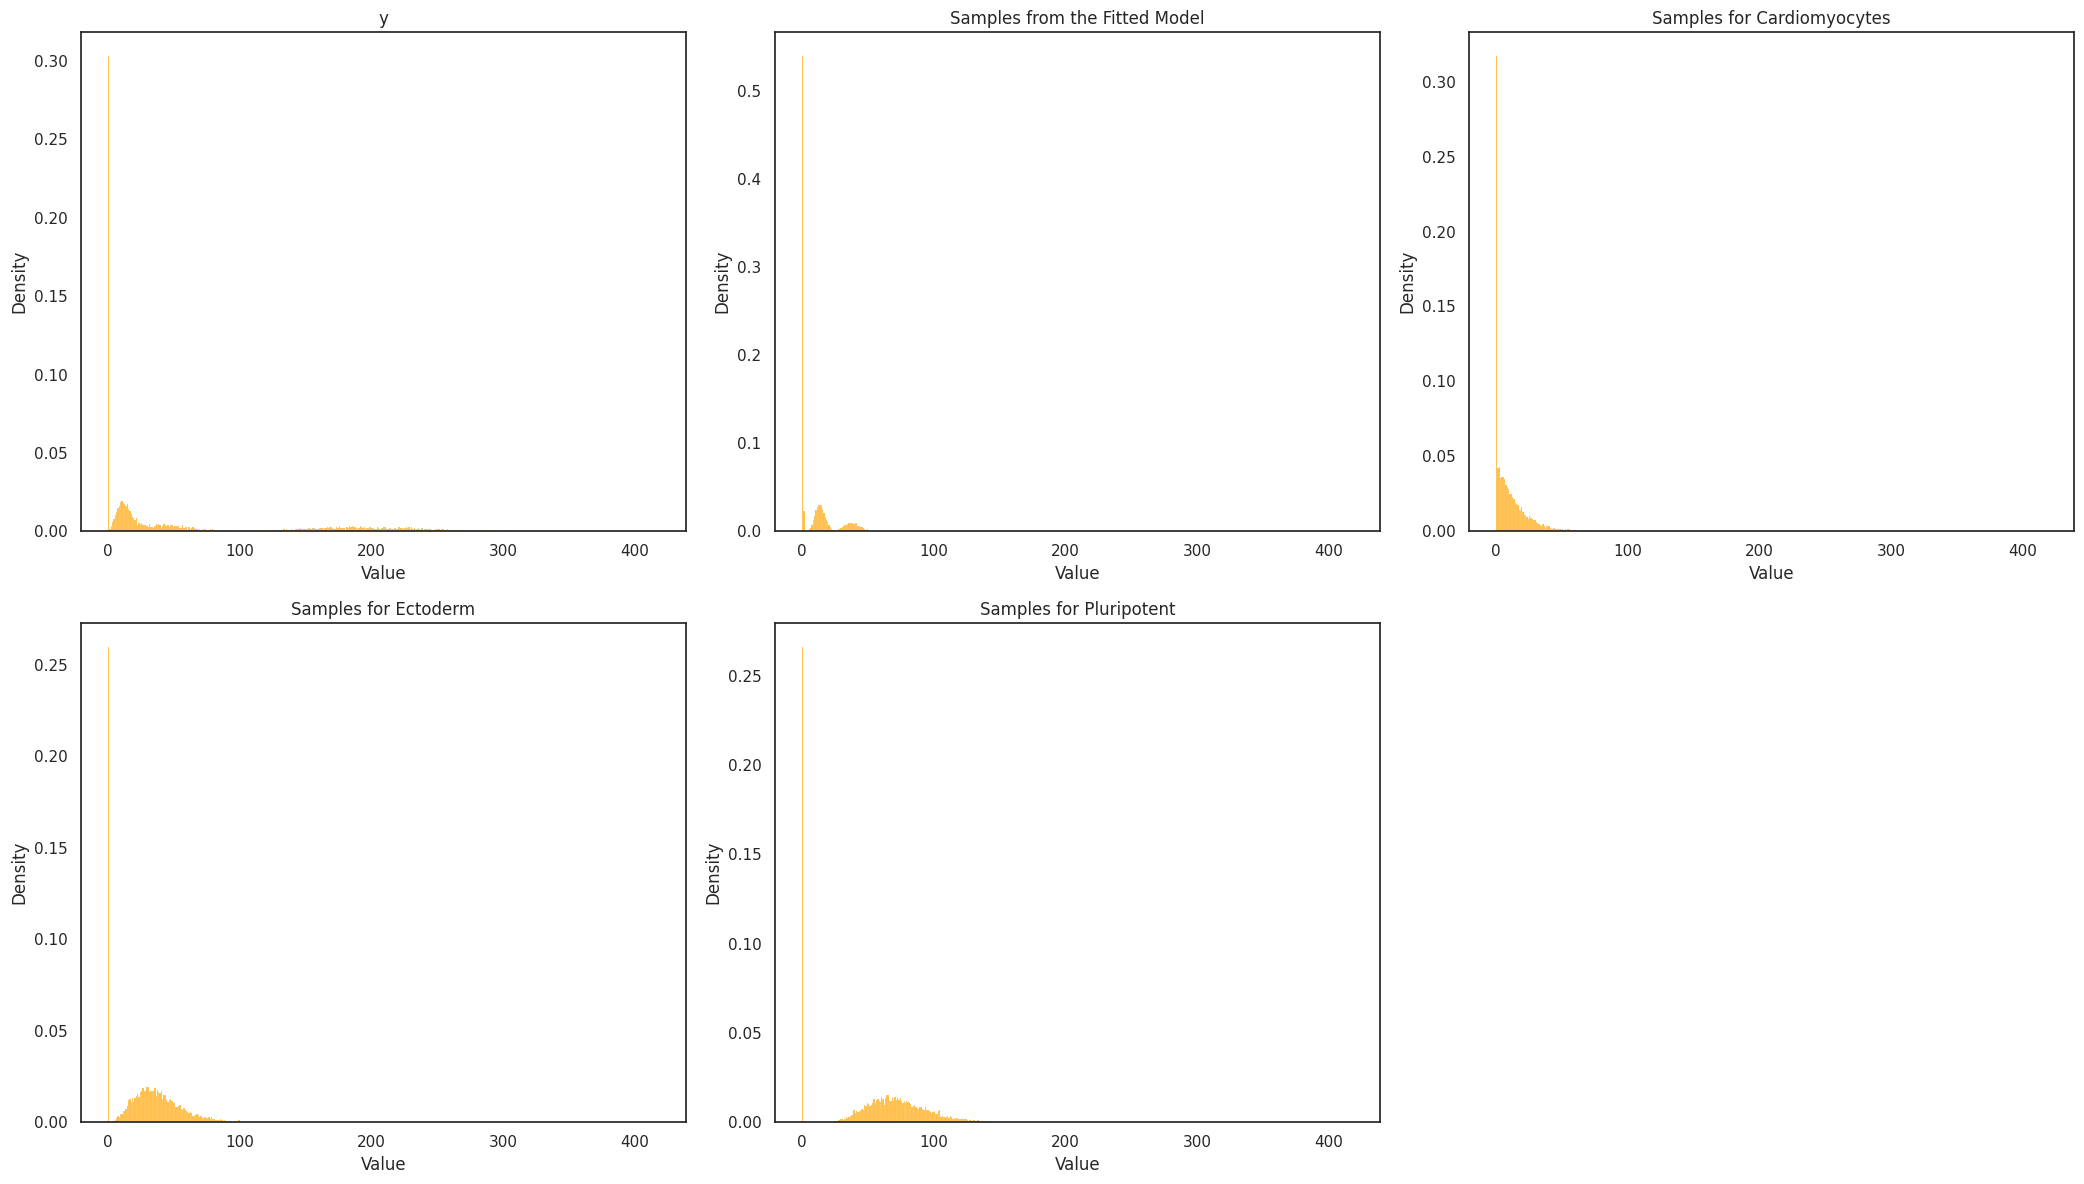

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom, bernoulli
from glmpy import ZINBModel

# Function to generate data
def generate_data(size, pi=0.3):  # Default pi value can be set here
    cell_types = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]
    probabilities = [0.4, 0.2, 0.4]
    mu_values = [13, 50, 200]
    # log lambdas: [2.56, 3.91, 5.30]
    # logit(pi): -0.8473
    alpha_values = [5, 10, 20]  # Dispersion parameters for each cell type

    cell_type_samples = np.random.choice(cell_types, size=size, p=probabilities)
    
    y_samples = np.zeros(size, dtype=int)
    
    for i, cell_type in enumerate(cell_types):
        indices = np.where(cell_type_samples == cell_type)[0]
        mu = mu_values[i]
        alpha = alpha_values[i]
        r = alpha
        p = alpha / (mu + alpha)
        zero_inflated = bernoulli.rvs(pi, size=len(indices))
        y_samples[indices] = np.where(zero_inflated == 1, 0, nbinom.rvs(r, p, size=len(indices)))
    
    covariates = {
        "cell_type": cell_type_samples,
    }
    
    return y_samples, covariates

# Generate data
y, covariates = generate_data(size=10000)

# Fit the model
model = ZINBModel(y=y, covariates=covariates, name="ZINBModel")
fit_res = model.fit(
    optimization_method="dogleg",
    verbose=False,
    parallel=False,
    ret_time=False,
    regularization_params=None,
    safe=False,
    minimize_options={"disp": False, "maxiter": None},
)

params = fit_res[0]

X = model.X
pmf = model.pmf_range(params=params, upper_bound=260, lower_bound=0, design_matrix=X, mu=None)
pmf = pmf / np.sum(pmf)

samples = model.sample(params=params, size=20000, design_matrix=X)

# Covariate list
covariate_list = ["Cardiomyocytes", "Ectoderm", "Pluripotent"]

# Plotting the results
sns.set(style="white")
plt.figure(figsize=(21, 12))

x_max = np.max(y)
bins = np.arange(0, x_max + 1)

plt.subplot(2, 3, 1)
sns.histplot(y, bins=bins, kde=False, color='orange', stat='density')
# plt.yscale('log')
# plt.ylim(1e-6, 1)
plt.title('y')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 3, 2)
sns.histplot(samples, bins=bins, kde=False, color='orange', stat='density')
# plt.yscale('log')
# plt.ylim(1e-6, 1)
plt.title('Samples from the Fitted Model')
plt.xlabel('Value')
plt.ylabel('Density')

# Loop through each cell type and plot results
for i, cell_type in enumerate(covariate_list):
    samples_covariate = ZINBModel.sample_from_covariate(params, cell_type, covariate_list, 10000, X)
    plt.subplot(2, 3, i + 3)
    sns.histplot(samples_covariate, bins=bins, kde=False, color='orange', stat='density')
    # plt.yscale('log')
    # plt.ylim(1e-6, 1)
    plt.title(f'Samples for {cell_type}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()
